# Working with a larger example (multiclass classification)

In [30]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [2]:
# The data is already been splitted into training and test sets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 3s 1us/step


In [3]:
# show the first example sample
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [4]:
# check the shape of the first sample
train_data[0].shape, train_labels[0].shape

((28, 28), ())

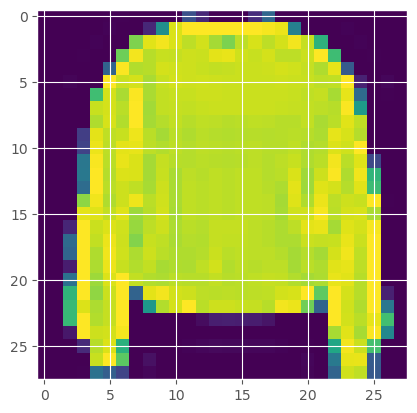

In [5]:
# plot a single sample
plt.imshow(train_data[7]);

In [6]:
# check out the sample label
train_labels[7]

2

In [7]:
# create a small list that can indexing the labels in human-readable
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

In [8]:
# plot an example image and a label
def plot_one_img(index_of_choice=0):
    plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[index_of_choice]])
    plt.axis(False)
    plt.show()

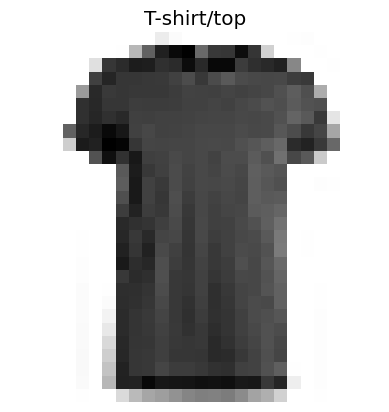

In [9]:
plot_one_img(17)

In [25]:
# plot multiple random images of fashion MNIST
import random

def plot_random_mnist():
    plt.figure(figsize=(12, 5))
    for i in range(4):
        ax = plt.subplot(2, 2, i+1)
        rand_index = random.choice(range(len(train_data)))
        plot_one_img(rand_index)


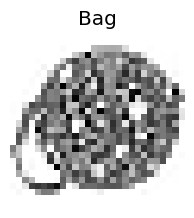

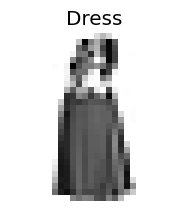

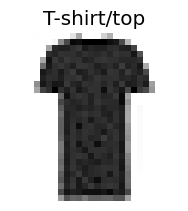

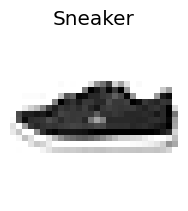

In [26]:
plot_random_mnist()

# Building a multiclass classification

## Model without Normalization

In [28]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Input((28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),   
])

model_1.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"],
)

batch_size = 512
epochs = 16
history = model_1.fit(
    train_data,
    train_labels,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(test_data, test_labels)
)

2022-12-08 10:09:32.416460: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/16
118/118 [==============================] - 3s 12ms/step - loss: 7.8525 - accuracy: 0.6952 - val_loss: 2.7626 - val_accuracy: 0.7483
Epoch 2/16
118/118 [==============================] - 1s 10ms/step - loss: 1.7754 - accuracy: 0.7821 - val_loss: 1.4682 - val_accuracy: 0.7799
Epoch 3/16
118/118 [==============================] - 1s 11ms/step - loss: 1.1468 - accuracy: 0.7978 - val_loss: 1.1582 - val_accuracy: 0.7939
Epoch 4/16
118/118 [==============================] - 1s 9ms/step - loss: 0.8534 - accuracy: 0.8117 - val_loss: 0.9239 - val_accuracy: 0.7947
Epoch 5/16
118/118 [==============================] - 1s 9ms/step - loss: 0.6976 - accuracy: 0.8184 - val_loss: 0.8121 - val_accuracy: 0.8085
Epoch 6/16
118/118 [==============================] - 1s 9ms/step - loss: 0.6048 - accuracy: 0.8282 - val_loss: 0.7815 - val_accuracy: 0.7930
Epoch 7/16
118/118 [==============================] - 1s 11ms/step - loss: 0.5416 - accuracy: 0.8342 - val_loss: 0.8329 - val_accuracy: 0.7736
Ep

In [29]:
score = model_1.evaluate(test_data, test_labels, verbose=0)
print(f"Test loss : {score[0]}")
print(f"Test accuracy : {score[1]}")

Test loss : 0.5749501585960388
Test accuracy : 0.8331999778747559


In [31]:
df_model1 = pd.DataFrame(history.history)
df_model1.head()

,loss,accuracy,val_loss,val_accuracy
0,7.852541,0.695150,2.762632,0.7483
1,1.775356,0.782150,1.468244,0.7799
2,1.146834,0.797817,1.158231,0.7939
3,0.853447,0.811700,0.923947,0.7947
4,0.697630,0.818433,0.812051,0.8085


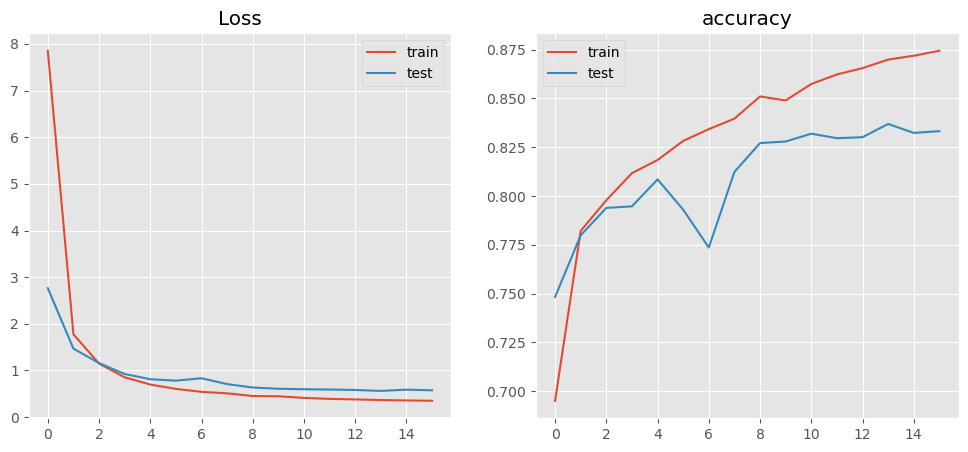

In [33]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(len(df_model1)), df_model1.loss, label="train")
plt.plot(range(len(df_model1)), df_model1.val_loss, label="test")
plt.title("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(range(len(df_model1)), df_model1.accuracy, label="train")
plt.plot(range(len(df_model1)), df_model1.val_accuracy, label="test")
plt.title("accuracy")
plt.legend()
plt.show()

## Scaling model

In [35]:
print(f"Before normalization: Min: {train_data.min()} -- Max: {train_data.max()}")

# Normalization
xmax = train_data.max()
train_data = train_data / xmax
test_data = test_data / xmax

print(f"After normalization: Min: {train_data.min()} -- Max: {train_data.max()}")

Before normalization: Min: 0 -- Max: 255
After normalization: Min: 0.0 -- Max: 1.0


In [37]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Input((28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),   
])

model_2.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"],
)

batch_size = 512
epochs = 16

history2 = model_2.fit(
    train_data,
    train_labels,
    batch_size=batch_size,
    epochs=epochs,
    verbose=0,
    validation_data=(test_data, test_labels)
)

In [39]:
score = model_2.evaluate(test_data, test_labels, verbose=0)
print(f"Test loss: {score[0]}")
print(f"Test accuracy: {score[1]}")

Test loss: 0.3413426876068115
Test accuracy: 0.8769000172615051


In [40]:
df_model2 = pd.DataFrame(history2.history)
df_model2.head()

,loss,accuracy,val_loss,val_accuracy
0,0.728623,0.754667,0.506437,0.8208
1,0.447252,0.842433,0.451881,0.8413
2,0.404647,0.858933,0.432989,0.8478
3,0.372655,0.868967,0.400246,0.8588
4,0.352473,0.875933,0.396628,0.8609


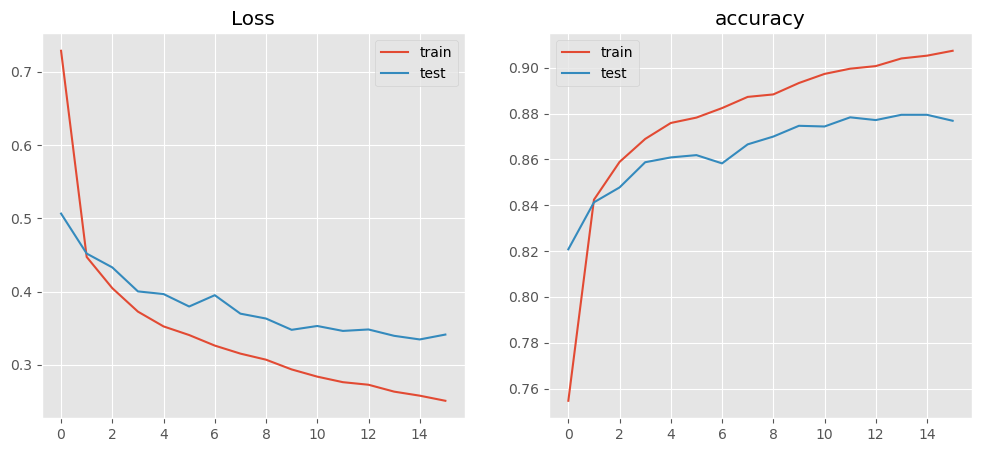

In [41]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(len(df_model2)), df_model2.loss, label="train")
plt.plot(range(len(df_model2)), df_model2.val_loss, label="test")
plt.title("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(range(len(df_model2)), df_model2.accuracy, label="train")
plt.plot(range(len(df_model2)), df_model2.val_accuracy, label="test")
plt.title("accuracy")
plt.legend()
plt.show()

# Fitting the best Learning Rate

In [51]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Input((28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

model_3.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"]
)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch / 20))

batch_size = 512
epochs = 50

history3 = model_3.fit(
    train_data,
    train_labels,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(test_data, test_labels),
    callbacks=[lr_scheduler],
)

Epoch 1/50
118/118 [==============================] - 2s 11ms/step - loss: 1.5348 - accuracy: 0.5605 - val_loss: 0.9680 - val_accuracy: 0.7006 - lr: 1.0000e-04
Epoch 2/50
118/118 [==============================] - 1s 10ms/step - loss: 0.7802 - accuracy: 0.7530 - val_loss: 0.6916 - val_accuracy: 0.7748 - lr: 1.1220e-04
Epoch 3/50
118/118 [==============================] - 1s 9ms/step - loss: 0.6167 - accuracy: 0.7980 - val_loss: 0.5957 - val_accuracy: 0.8012 - lr: 1.2589e-04
Epoch 4/50
118/118 [==============================] - 1s 10ms/step - loss: 0.5426 - accuracy: 0.8186 - val_loss: 0.5414 - val_accuracy: 0.8131 - lr: 1.4125e-04
Epoch 5/50
118/118 [==============================] - 1s 9ms/step - loss: 0.4961 - accuracy: 0.8314 - val_loss: 0.5037 - val_accuracy: 0.8246 - lr: 1.5849e-04
Epoch 6/50
118/118 [==============================] - 1s 9ms/step - loss: 0.4666 - accuracy: 0.8396 - val_loss: 0.4870 - val_accuracy: 0.8287 - lr: 1.7783e-04
Epoch 7/50
118/118 [=======================

In [53]:
score = model_3.evaluate(test_data, test_labels, verbose=0)
print(f"Test loss: {score[0]}")
print(f"Test acc: {score[1]}")

Test loss: 0.4188151955604553
Test acc: 0.8618000149726868


In [54]:
df_model3 = pd.DataFrame(history3.history)
df_model3.head()

,loss,accuracy,val_loss,val_accuracy,lr
0,1.534806,0.560533,0.967991,0.7006,0.000100
1,0.780249,0.752983,0.691590,0.7748,0.000112
2,0.616668,0.797967,0.595676,0.8012,0.000126
3,0.542591,0.818567,0.541381,0.8131,0.000141
4,0.496096,0.831383,0.503651,0.8246,0.000158


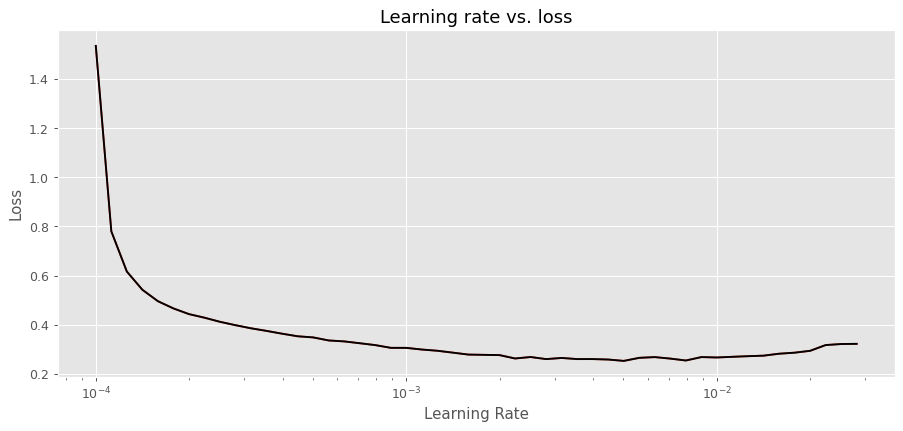

In [91]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(50)/20))
plt.figure(figsize=(12, 5), dpi=90)
plt.semilogx(lrs, df_model3.loss)
plt.semilogx(df_model3.lr, df_model3.loss, c="k")
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss")
plt.show()

In [96]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Input((28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),   
])

model_4.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
    metrics=["accuracy"],
)

batch_size = 512
epochs = 16

history4 = model_4.fit(
    train_data,
    train_labels,
    batch_size=batch_size,
    epochs=epochs,
    verbose=0,
    validation_data=(test_data, test_labels)
)

In [97]:
score = model_4.evaluate(test_data, test_labels, verbose=0)
print(f"Test loss: {score[0]}")
print(f"Test acc: {score[1]}")

Test loss: 0.35269880294799805
Test acc: 0.8765000104904175


In [98]:
df_model4 = pd.DataFrame(history2.history)
df_model4.head()

,loss,accuracy,val_loss,val_accuracy
0,0.728623,0.754667,0.506437,0.8208
1,0.447252,0.842433,0.451881,0.8413
2,0.404647,0.858933,0.432989,0.8478
3,0.372655,0.868967,0.400246,0.8588
4,0.352473,0.875933,0.396628,0.8609


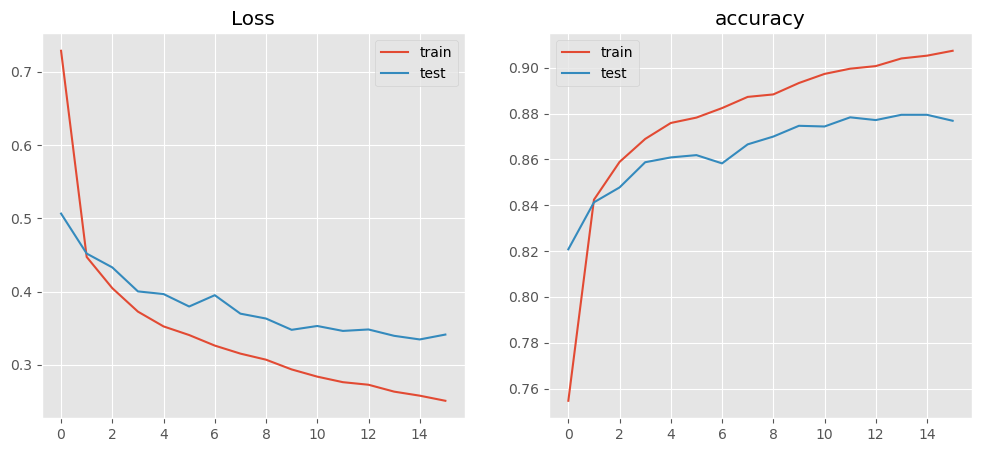

In [99]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(len(df_model4)), df_model4.loss, label="train")
plt.plot(range(len(df_model4)), df_model4.val_loss, label="test")
plt.title("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(range(len(df_model4)), df_model4.accuracy, label="train")
plt.plot(range(len(df_model4)), df_model4.val_accuracy, label="test")
plt.title("accuracy")
plt.legend()
plt.show()

In [100]:
from sklearn.metrics import confusion_matrix

y_sigmoid = model_2.predict(test_data)
y_preds = np.argmax(y_sigmoid, axis=-1)

cm = confusion_matrix(y_true=test_labels, y_pred=y_preds)

313/313 [==============================] - 1s 2ms/step


In [86]:
cm

array([[868,   1,   9,  18,   6,   1,  91,   0,   6,   0],
       [  7, 960,   0,  25,   5,   0,   2,   0,   1,   0],
       [ 23,   1, 710,  13, 201,   0,  50,   0,   2,   0],
       [ 27,   2,   7, 889,  43,   0,  28,   0,   4,   0],
       [  1,   1,  46,  25, 889,   0,  34,   0,   4,   0],
       [  0,   0,   0,   1,   0, 967,   0,  19,   1,  12],
       [142,   1,  82,  29, 114,   0, 623,   0,   9,   0],
       [  0,   0,   0,   0,   0,  33,   0, 953,   0,  14],
       [ 10,   0,   2,   4,   8,   3,   6,   4, 963,   0],
       [  0,   0,   0,   0,   0,  10,   1,  42,   0, 947]])

In [87]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
    """Makes a labelled confusion matrix comparing predictions and ground truth labels.

    If classes is passed, confusion matrix will be labelled, if not, integer class values
    will be used.

    Args:
      y_true: Array of truth labels (must be same shape as y_pred).
      y_pred: Array of predicted labels (must be same shape as y_true).
      classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
      figsize: Size of output figure (default=(10, 10)).
      text_size: Size of output figure text (default=15).
  
    Returns:
      A labelled confusion matrix plot comparing y_true and y_pred.

    Example usage:
      make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
    """  
    # Create the confustion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0] # find the number of classes we're dealing with

    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)

    # Are there a list of classes?
    if classes:
      labels = classes
    else:
      labels = np.arange(cm.shape[0])
  
    # Label the axes
    ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
        horizontalalignment="center",
        color="white" if cm[i, j] > threshold else "black",
        size=text_size)


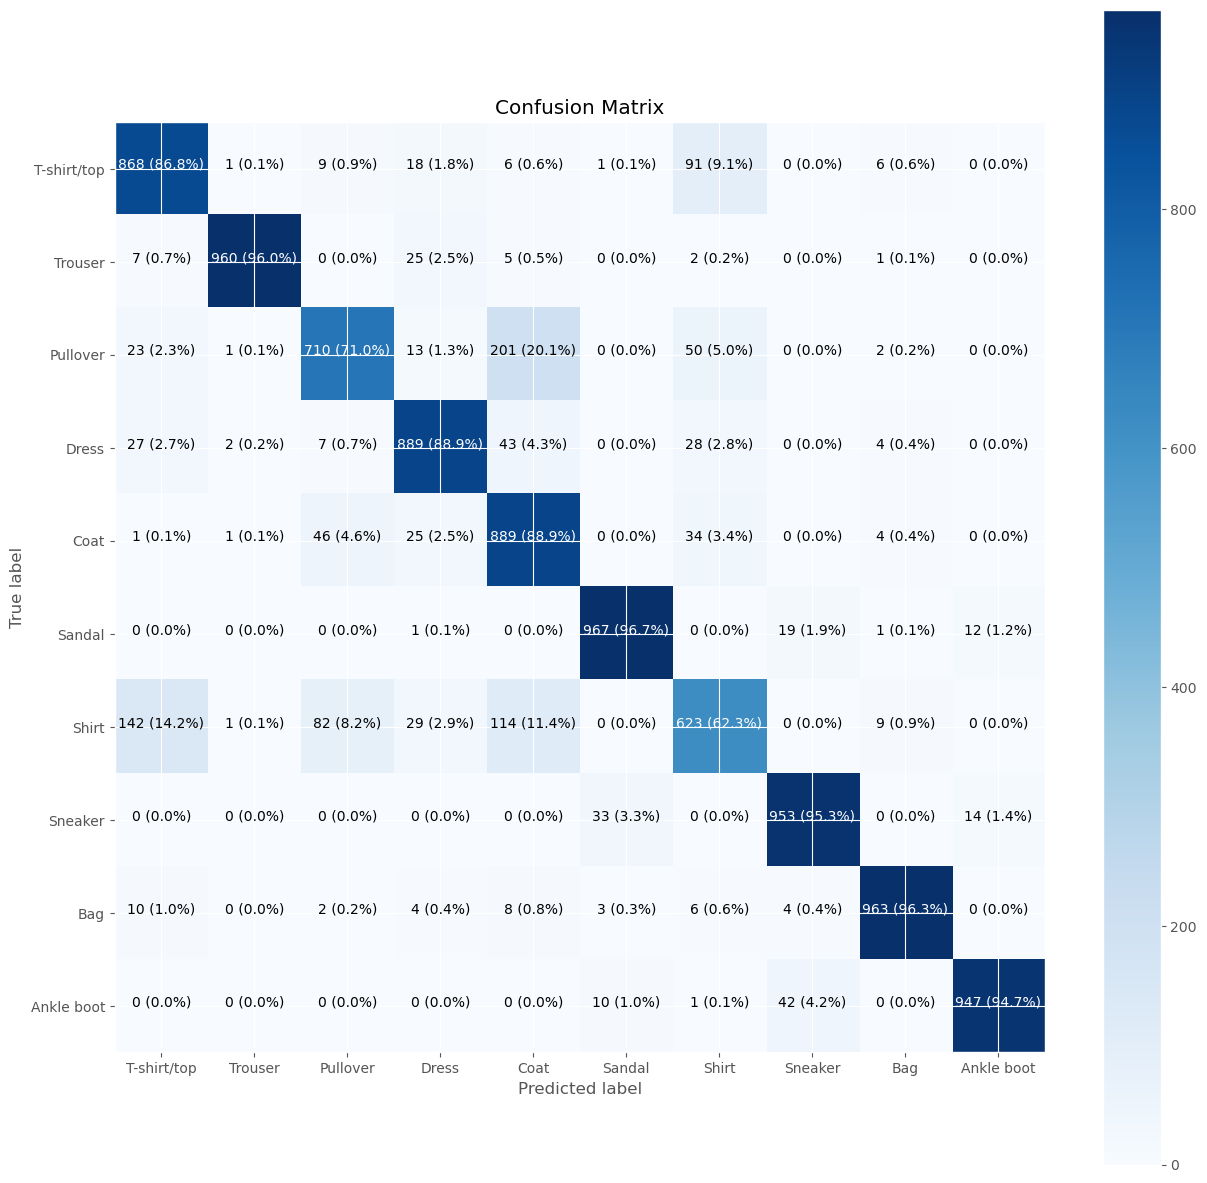

In [88]:
make_confusion_matrix(
    y_true=test_labels, 
    y_pred=y_preds,
    classes=class_names,
    figsize=(15, 15),
    text_size=10
)

In [115]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
    """Picks a random image, plots it and labels it with a predicted and truth label.

    Args:
      model: a trained model (trained on data similar to what's in images).
      images: a set of random images (in tensor form).
      true_labels: array of ground truth labels for images.
      classes: array of class names for images.
  
    Returns:
      A plot of a random image from `images` with a predicted class label from `model`
      as well as the truth class label from `true_labels`.
    """ 
    # Setup random integer
    i = random.randint(0, len(images))
  
    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28), verbose=0) # have to reshape to get into right size for model
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # Plot the target image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
      color = "green"
    else:
      color = "red"

    # Add xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red
    

1/1 [==============================] - 0s 40ms/step


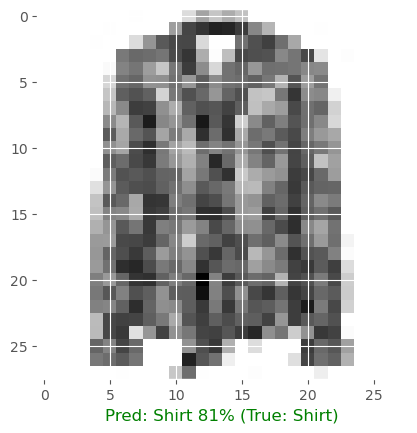

In [108]:
plot_random_image(
    model=model_2, 
    images=test_data, 
    true_labels=test_labels, 
    classes=class_names,
)

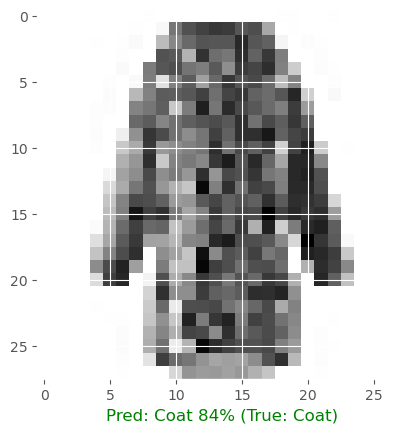

In [116]:
plot_random_image(
    model=model_2, 
    images=test_data, 
    true_labels=test_labels, 
    classes=class_names,
)

# What patterns is our model learning?

We've been talking a lot about how a neural network finds patterns in numbers, but what exactly do these patterns look like?

Let's crack open one of our models and find out.

In [117]:
model_2.layers

We can access a target layer using indexing.

In [118]:
model_2.layers[0]


And we can find the patterns learned by a particular layer using the `get_weights()` method.

The `get_weights()` method returns the **weights** (also known as a *weights matrix*) and **biases** (also known as a *bias vector*) of a particular layer.


In [119]:
# Get the patterns of a layer in our network
weights, biases = model_2.layers[1].get_weights()

weights, weights.shape

(array([[-0.142192  ,  0.01052436,  0.05428005, ..., -0.23940651,
          0.23377836, -0.07865392],
        [ 0.0276633 ,  0.12906565, -0.03745979, ..., -0.03990309,
          0.1371302 ,  0.08236455],
        [ 0.18268287,  0.05039126, -0.04954408, ..., -0.04186452,
         -0.06526805, -0.07007911],
        ...,
        [-0.00779887,  0.09522728,  0.03569289, ..., -0.00496882,
         -0.17557523, -0.08976691],
        [-0.06081852,  0.15574528, -0.135325  , ...,  0.06341487,
          0.01295932, -0.13610367],
        [ 0.04333069,  0.09808418, -0.22789347, ...,  0.00415616,
          0.10641107, -0.08782673]], dtype=float32),
 (784, 100))

In [120]:
biases, biases.shape

(array([ 0.14746799, -0.02305458,  0.05667654, -0.05982877,  0.12132204,
         0.09283456,  0.12745608, -0.0738838 ,  0.07999629,  0.13879624,
        -0.01338943,  0.08214672,  0.12943599,  0.01111   ,  0.05628815,
         0.06860252,  0.17349079, -0.09984655,  0.01942476,  0.01372646,
        -0.13816985,  0.1400134 ,  0.18204045, -0.00728048,  0.13517861,
        -0.00498789, -0.07697031, -0.05976186, -0.03227862,  0.17338091,
         0.10755667, -0.12065977,  0.11267851,  0.16021599,  0.01074302,
         0.2556328 ,  0.16249895,  0.05818386,  0.09530549, -0.13605362,
         0.16155617, -0.02628417,  0.19087681,  0.10485815,  0.05771168,
         0.12820949, -0.08008935, -0.12946023, -0.14068535,  0.05248275,
        -0.05906241, -0.00872908,  0.17186216, -0.03581305,  0.06605017,
         0.18943243,  0.17857318,  0.09077211,  0.09464293,  0.1192404 ,
         0.15825507, -0.14225842,  0.1354451 , -0.09965325, -0.17462741,
        -0.04003489,  0.07261354,  0.2631386 , -0.0

In [121]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [122]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_2, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
